In [1]:
import sys
import os

if os.path.abspath('..') is not sys.path:
    sys.path.insert(0, os.path.abspath('..'))

In [2]:
import torch
import pandas as pd
import numpy as np
from bi_gp.bilateral_kernel import MaternLattice, RBFLattice
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2., style='whitegrid', palette=sns.color_palette('Set1'))
device = "cuda" if torch.cuda.is_available() else None

In [25]:
def rel_err(x,y):
  return ((x-y)**2).mean().sqrt()/((x**2).mean().sqrt()+(y**2).mean().sqrt())

In [3]:
K = RBFLattice(order=1).to(device)

Discretized kernel coeffs: tensor([0.3461, 1.0000, 0.3461])
Discretized kernel deriv coeffs: tensor([0.3461, 1.0000, 0.3461])


In [4]:
snel = pd.read_csv('snelson.csv')
snel = snel.iloc[np.random.permutation(range(snel.shape[0]))]
snel_x = torch.from_numpy(snel.x.to_numpy()).unsqueeze(-1).float().to(device)
snel_y = torch.from_numpy(snel.y.to_numpy()).float().to(device)

tensor(3.6780e-08, device='cuda:0')

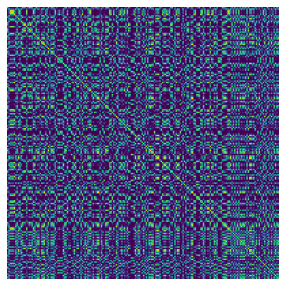

In [30]:
with torch.no_grad():
    kxx = K(snel_x, snel_x) @ torch.eye(snel_x.size(0), device=device)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(kxx.cpu().numpy(), cmap=plt.cm.viridis)
ax.axis('off');

## pd
torch.inverse(kxx)

## symmetric
assert torch.allclose(kxx, kxx.transpose(1, 0))

rel_err(kxx, kxx.transpose(1,0))

In [101]:
from experiments.utils import prepare_dataset

data_iter = prepare_dataset('protein', uci_data_dir=None, device=device)
_, X, y = next(data_iter)

perm = torch.randperm(X.size(0))
X = X[perm[:10000]]

print((X.isinf() | X.isnan()).sum())

with torch.no_grad():
    kxx = K(X, X) @ torch.eye(X.size(0), device=device)

# fig, ax = plt.subplots(figsize=(5,5))
# ax.imshow(kxx.cpu().numpy(), cmap=plt.cm.viridis)
# ax.axis('off');

## pd
torch.inverse(kxx)

## symmetric
print(rel_err(kxx, kxx.transpose(1,0)))

(kxx - kxx.transpose(1, 0)).mean(), 2. * (kxx - kxx.transpose(1, 0)).std()

tensor(0, device='cuda:0')
tensor(0.0194, device='cuda:0')


(tensor(0., device='cuda:0'), tensor(0.0021, device='cuda:0'))